In [1]:
from large_gcs.contact.contact_location import *
from large_gcs.contact.contact_pair_mode import *
from large_gcs.contact.rigid_body import *
from large_gcs.geometry.polyhedron import Polyhedron
from large_gcs.graph.contact_graph import ContactGraph
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm

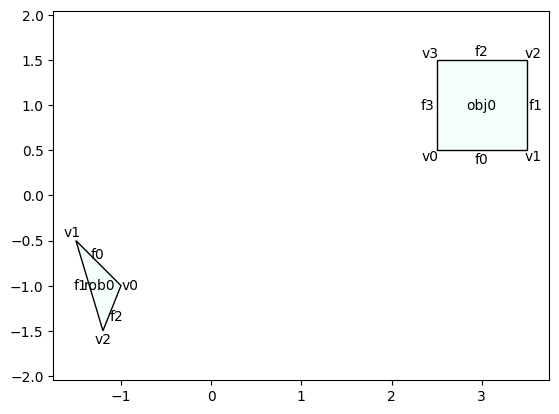

In [2]:
# 2 items
# obs_vertices = [
#     np.array([[0, 0], [1, 0], [0, -1]])
# ]
# obj_vertices = [
# ]
# rob_vertices = [
#     np.array([[-1,-1],[-1.5,-0.5],[-1.2, -1.5]])
# ]

# # 2 movable items
obs_vertices = []
obj_vertices = [np.array([[0, 0], [1, 0], [1, 1], [0, 1]]) + np.array([2.5, 0.5])]
rob_vertices = [np.array([[-1, -1], [-1.5, -0.5], [-1.2, -1.5]])]
source_obj_pos = [[1, 1]]
source_rob_pos = [[-1, -1]]
target_obj_pos = [[-1, -1]]
target_rob_pos = [[1, 1]]

# 3 items
# obs_vertices = [
#     np.array([[0, 0], [1, 0], [0, -1]])
# ]
# obj_vertices = [
#     np.array([[0, 0], [1, 0], [1, 1], [0,1]]) + np.array([2.5,0.5])
# ]
# rob_vertices = [
#     np.array([[-1,-1],[-1.5,-0.5],[-1.2, -1.5]])
# ]

# # 3 boxes
# obs_vertices = [
#     np.array([[0, 0], [2, 0], [2, 1], [0,1]])
# ]
# obj_vertices = [
#     np.array([[0, 0], [1, 0], [1, 1], [0,1]]) + np.array([2.5,0.5])
# ]
# rob_vertices = [
#     np.array([[0, 0], [0.5, 0], [0.5, 0.5], [0,0.5]]) + np.array([0,-1])
# ]

# # 4 items
# obs_vertices = [
#     np.array([[0, 0], [1, 0], [0, -1]])
# ]
# obj_vertices = [
#     np.array([[0, 0], [1, 0], [1, -0.5]]) + np.array([1.5, 0]),
#     np.array([[0, 0], [1, 0], [1, 1], [0,1]]) + np.array([2.5,0.5])
# ]
# rob_vertices = [
#     np.array([[-1,-1],[-1.5,-0.5],[-1.2, -1.5]])
# ]
obs = []
objs = []
robs = []
n_pos_per_set = 10
for i in range(len(obs_vertices)):
    obs.append(
        RigidBody(
            name=f"obs{i}",
            geometry=Polyhedron.from_vertices(obs_vertices[i]),
            mobility_type=MobilityType.STATIC,
            n_pos_points=n_pos_per_set,
        )
    )
for i in range(len(obj_vertices)):
    objs.append(
        RigidBody(
            name=f"obj{i}",
            geometry=Polyhedron.from_vertices(obj_vertices[i]),
            mobility_type=MobilityType.UNACTUATED,
            n_pos_points=n_pos_per_set,
        )
    )
for i in range(len(rob_vertices)):
    robs.append(
        RigidBody(
            name=f"rob{i}",
            geometry=Polyhedron.from_vertices(rob_vertices[i]),
            mobility_type=MobilityType.ACTUATED,
            n_pos_points=n_pos_per_set,
        )
    )
all_rigid_bodies = obs + objs + robs

for rigid_body in all_rigid_bodies:
    rigid_body.plot()

In [3]:
contact_graph = ContactGraph(
    obs, objs, robs, source_obj_pos, source_rob_pos, target_obj_pos, target_rob_pos
)

print(contact_graph.params)

vars_pos shape (2, 2, 10)
[[[Variable('obj0_pos(0, 0)', Continuous)
   Variable('obj0_pos(0, 1)', Continuous)
   Variable('obj0_pos(0, 2)', Continuous)
   Variable('obj0_pos(0, 3)', Continuous)
   Variable('obj0_pos(0, 4)', Continuous)
   Variable('obj0_pos(0, 5)', Continuous)
   Variable('obj0_pos(0, 6)', Continuous)
   Variable('obj0_pos(0, 7)', Continuous)
   Variable('obj0_pos(0, 8)', Continuous)
   Variable('obj0_pos(0, 9)', Continuous)]
  [Variable('obj0_pos(1, 0)', Continuous)
   Variable('obj0_pos(1, 1)', Continuous)
   Variable('obj0_pos(1, 2)', Continuous)
   Variable('obj0_pos(1, 3)', Continuous)
   Variable('obj0_pos(1, 4)', Continuous)
   Variable('obj0_pos(1, 5)', Continuous)
   Variable('obj0_pos(1, 6)', Continuous)
   Variable('obj0_pos(1, 7)', Continuous)
   Variable('obj0_pos(1, 8)', Continuous)
   Variable('obj0_pos(1, 9)', Continuous)]]

 [[Variable('rob0_pos(0, 0)', Continuous)
   Variable('rob0_pos(0, 1)', Continuous)
   Variable('rob0_pos(0, 2)', Continuous)
   V

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 11.54it/s]


Each body pair has on average 11.0 modes
Generating contact sets for 11 sets...


100%|██████████| 11/11 [00:00<00:00, 656.75it/s]


Pruning empty sets...


100%|██████████| 11/11 [00:00<00:00, 96.23it/s]

11 sets remain after removing 0 empty sets
exprs: [[<Expression "(u_obj0_pos(0, 9) - v_obj0_pos(0, 0))">]
 [<Expression "(u_obj0_pos(1, 9) - v_obj0_pos(1, 0))">]
 [<Expression "(u_rob0_pos(0, 9) - v_rob0_pos(0, 0))">]
 [<Expression "(u_rob0_pos(1, 9) - v_rob0_pos(1, 0))">]]
exprs: [<Expression "(u_obj0_pos(0, 9) - v_obj0_pos(0, 0))">]
Affine A: [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.]]
b: [0.]
exprs: [<Expression "(u_obj0_pos(1, 9) - v_obj0_pos(1, 0))">]
Affine A: [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.
   0.  0.  0.  0.  


100%|██████████| 78/78 [00:02<00:00, 29.04it/s]


24 edges generated
GraphParams(dim=40, n_vertices=13, n_edges=24, source=[[1, 1], [-1, -1]], target=[[-1, -1], [1, 1]], workspace=None, default_costs_constraints=DefaultGraphCostsConstraints(vertex_costs=[<pydrake.solvers.L2NormCost object at 0x11e75a570>], vertex_constraints=[], edge_costs=[<pydrake.solvers.LinearCost object at 0x186f720f0>], edge_constraints=[<pydrake.solvers.LinearEqualityConstraint object at 0x186fda130>, <pydrake.solvers.LinearEqualityConstraint object at 0x131ffa870>, <pydrake.solvers.LinearEqualityConstraint object at 0x186ffaa70>, <pydrake.solvers.LinearEqualityConstraint object at 0x186ffab70>]))


In [4]:
sol = contact_graph.solve()

Post solve hook called...
ambient path: [[ 1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.        ]
 [ 2.9444874   2.83806563  2.73164407  2.62522219  2.51879996  2.41237794
   2.30595569  2.1995334   2.09311129  1.98668961  0.9439414   0.83752022
   0.73109905  0.62467787  0.5182567   0.41183553  0.30541435  0.19899318
   0.092572   -0.01384917 -0.59130798 -0.48488615 -0.37846455 -0.27204261
  -0.16562034 -0.05919826  0.04722403  0.15364637  0.26006853  0.3664903
  -0.75674609 -0.65032494 -0.5439038  -0.43748266 -0.33106152 -0.22464038
  -0.11821924 -0.01179809  0.09462305  0.20104419]
 [ 0.23135105  0.17

In [5]:
contact_sol = contact_graph.contact_spp_sol
# print(contact_sol)

In [6]:
def plot_path(sol):
    n_time_steps = sol.object_pos_trajectories.shape[2]

    for j in range(n_time_steps):
        plt.figure()
        # Plot object trajectories
        for i in range(sol.object_pos_trajectories.shape[0]):
            contact_graph.objects[i].plot_at_position(
                sol.object_pos_trajectories[i, :, j]
            )
        for i in range(sol.robot_pos_trajectories.shape[0]):
            contact_graph.robots[i].plot_at_position(
                sol.robot_pos_trajectories[i, :, j]
            )
        # Show the plot
        plt.axis("equal")
        plt.xlim(-5, 5)
        plt.ylim(-5, 5)

        plt.grid()
        plt.show()


# plot_path(contact_sol)

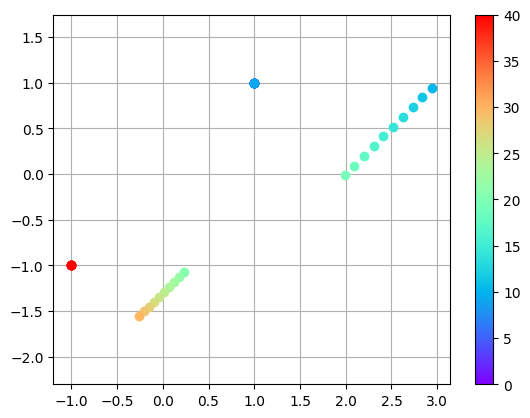

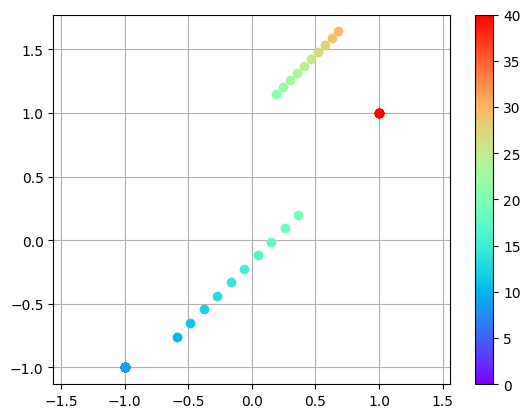

In [7]:
contact_graph.plot_path()

In [8]:
for i in range(contact_sol.object_pos_trajectories.shape[2]):
    if i % n_pos_per_set == 0:
        print("-----")
    print(
        "object",
        contact_sol.object_pos_trajectories[0, :, i],
        "robot",
        contact_sol.robot_pos_trajectories[0, :, i],
    )

    # print(f"last of set: {contact_sol.object_pos_trajectories[0, :, (i*n_pos_per_set)-1]}")
    # print(f"first of set: {contact_sol.object_pos_trajectories[0, :, i*n_pos_per_set]}")

-----
object [1. 1.] robot [-1. -1.]
object [1. 1.] robot [-1. -1.]
object [1. 1.] robot [-1. -1.]
object [1. 1.] robot [-1. -1.]
object [1. 1.] robot [-1. -1.]
object [1. 1.] robot [-1. -1.]
object [1. 1.] robot [-1. -1.]
object [1. 1.] robot [-1. -1.]
object [1. 1.] robot [-1. -1.]
object [1. 1.] robot [-1. -1.]
-----
object [2.9444874 0.9439414] robot [-0.59130798 -0.75674609]
object [2.83806563 0.83752022] robot [-0.48488615 -0.65032494]
object [2.73164407 0.73109905] robot [-0.37846455 -0.5439038 ]
object [2.62522219 0.62467787] robot [-0.27204261 -0.43748266]
object [2.51879996 0.5182567 ] robot [-0.16562034 -0.33106152]
object [2.41237794 0.41183553] robot [-0.05919826 -0.22464038]
object [2.30595569 0.30541435] robot [ 0.04722403 -0.11821924]
object [2.1995334  0.19899318] robot [ 0.15364637 -0.01179809]
object [2.09311129 0.092572  ] robot [0.26006853 0.09462305]
object [ 1.98668961 -0.01384917] robot [0.3664903  0.20104419]
-----
object [ 0.23135105 -1.06958915] robot [0.1934